Анализ котировок и поиск стратегии

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd

"Необработанный" датафрейм

In [32]:
df = pd.read_csv('/content/drive/MyDrive/bybit_ORIGINAL.csv')
df

,0,1,2,3,4,5,6
0,1585699260000,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04
1,1585699320000,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04
2,1585699380000,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04
3,1585699440000,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04
4,1585699500000,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04
...,...,...,...,...,...,...,...
1943995,1702338960000,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06
1943996,1702339020000,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06
1943997,1702339080000,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06
1943998,1702339140000,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06


In [33]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object')

Переименнуем признаки датафрейма

In [34]:
df = df.rename(columns = {'0' : 'Timestamp' ,'1' : 'Open' , '2' : 'High' ,'3' : 'Low' , '4' : 'Close' ,'5' : 'VolumeBTC' ,'6' : 'VolumeUSDT'}  )
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT
0,1585699260000,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04
1,1585699320000,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04
2,1585699380000,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04
3,1585699440000,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04
4,1585699500000,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04
...,...,...,...,...,...,...,...
1943995,1702338960000,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06
1943996,1702339020000,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06
1943997,1702339080000,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06
1943998,1702339140000,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06


Преобразуем поле с датой

In [35]:

from datetime import datetime

df.Timestamp = df.Timestamp.astype(int) / 1000



In [36]:
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT
0,1.585699e+09,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04
1,1.585699e+09,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04
2,1.585699e+09,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04
3,1.585699e+09,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04
4,1.585700e+09,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04
...,...,...,...,...,...,...,...
1943995,1.702339e+09,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06
1943996,1.702339e+09,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06
1943997,1.702339e+09,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06
1943998,1.702339e+09,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06


In [37]:
from datetime import datetime, timezone, timedelta
def convert_unix_to_datetime(unix_timestamp):
  dt_object = datetime.utcfromtimestamp(unix_timestamp)
  #dt_object = dt_object + timedelta(hours=3)
  formatted_date = dt_object.strftime('%Y%m%d %H%M%S')
  return formatted_date

In [39]:
df.Timestamp = df.Timestamp.map(convert_unix_to_datetime)

In [40]:
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT
0,20200401 000100,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04
1,20200401 000200,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04
2,20200401 000300,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04
3,20200401 000400,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04
4,20200401 000500,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04
...,...,...,...,...,...,...,...
1943995,20231211 235600,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06
1943996,20231211 235700,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06
1943997,20231211 235800,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06
1943998,20231211 235900,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944000 entries, 0 to 1943999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Timestamp   object 
 1   Open        float64
 2   High        float64
 3   Low         float64
 4   Close       float64
 5   VolumeBTC   float64
 6   VolumeUSDT  float64
dtypes: float64(6), object(1)
memory usage: 103.8+ MB


Разделим преобразованный столбец на два новых - дату и время

In [42]:
df['Time'] = df.Timestamp.map(lambda x : x.split(' ')[1])
df['Date'] = df.Timestamp.map(lambda x : x.split(' ')[0])
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT,Time,Date
0,20200401 000100,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04,000100,20200401
1,20200401 000200,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04,000200,20200401
2,20200401 000300,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04,000300,20200401
3,20200401 000400,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04,000400,20200401
4,20200401 000500,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04,000500,20200401
...,...,...,...,...,...,...,...,...,...
1943995,20231211 235600,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06,235600,20231211
1943996,20231211 235700,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06,235700,20231211
1943997,20231211 235800,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06,235800,20231211
1943998,20231211 235900,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06,235900,20231211


Визуально сверим график цены на графике с графиком на криптобирже. (Есть сходство - скачали данные правильно)

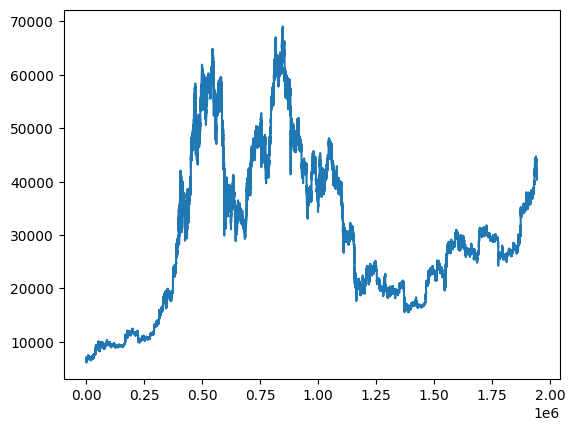

In [43]:
import matplotlib.pyplot as plt
plt.plot(df.Close)

In [45]:
df.tail(50)

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT,Time,Date
1943950,20231211 231100,41212.4,41253.1,41212.4,41248.7,40.117,1.654046e+06,231100,20231211
1943951,20231211 231200,41248.7,41252.2,41230.3,41230.4,25.293,1.043201e+06,231200,20231211
1943952,20231211 231300,41230.4,41240.0,41210.0,41210.0,46.834,1.930819e+06,231300,20231211
1943953,20231211 231400,41210.0,41240.0,41210.0,41231.1,23.440,9.662821e+05,231400,20231211
1943954,20231211 231500,41231.1,41246.5,41212.3,41240.2,76.115,3.137888e+06,231500,20231211
1943955,20231211 231600,41240.2,41247.1,41226.9,41242.1,36.719,1.514289e+06,231600,20231211
1943956,20231211 231700,41242.1,41253.8,41237.0,41251.9,29.384,1.211914e+06,231700,20231211
1943957,20231211 231800,41251.9,41274.4,41251.8,41274.4,40.977,1.690998e+06,231800,20231211
1943958,20231211 231900,41274.4,41275.7,41268.3,41272.0,47.415,1.956988e+06,231900,20231211
1943959,20231211 232000,41272.0,41274.7,41250.6,41250.7,54.954,2.267718e+06,232000,20231211


Способ отображения котировок как японских свечей

In [46]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

plt_df = df.iloc[1:100 , :]

fig = go.Figure(data=[go.Candlestick(x=plt_df.index,
                open=plt_df['Open'],
                high=plt_df['High'],
                low=plt_df['Low'],
                close=plt_df['Close'])])

fig.show()

Установка библиотеки для подсчёта индикаторов технического анализа.

In [47]:
pip install technical-analysis

Снова преобразуем наш датафрейм - достанем из признака "Время" час и минуту

In [49]:
df['Hour'] = df['Time'].map( lambda x : x[:2])
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT,Time,Date,Hour
0,20200401 000100,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04,000100,20200401,00
1,20200401 000200,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04,000200,20200401,00
2,20200401 000300,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04,000300,20200401,00
3,20200401 000400,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04,000400,20200401,00
4,20200401 000500,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04,000500,20200401,00
...,...,...,...,...,...,...,...,...,...,...
1943995,20231211 235600,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06,235600,20231211,23
1943996,20231211 235700,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06,235700,20231211,23
1943997,20231211 235800,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06,235800,20231211,23
1943998,20231211 235900,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06,235900,20231211,23


In [50]:
df['Minute'] = df['Time'].map( lambda x : x[2:4])
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT,Time,Date,Hour,Minute
0,20200401 000100,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04,000100,20200401,00,01
1,20200401 000200,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04,000200,20200401,00,02
2,20200401 000300,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04,000300,20200401,00,03
3,20200401 000400,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04,000400,20200401,00,04
4,20200401 000500,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04,000500,20200401,00,05
...,...,...,...,...,...,...,...,...,...,...,...
1943995,20231211 235600,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06,235600,20231211,23,56
1943996,20231211 235700,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06,235700,20231211,23,57
1943997,20231211 235800,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06,235800,20231211,23,58
1943998,20231211 235900,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06,235900,20231211,23,59


Из столбца "Дата" достанем как отдельные признаки Год,Месяц,День

In [51]:
df['Year'] = df['Date'].map( lambda x : x[:4])
df['Month'] = df['Date'].map( lambda x : x[4:6])
df['Day'] = df['Date'].map( lambda x : x[6:])
df

,Timestamp,Open,High,Low,Close,VolumeBTC,VolumeUSDT,Time,Date,Hour,Minute,Year,Month,Day
0,20200401 000100,6416.5,6416.5,6410.0,6415.0,7.286,4.673969e+04,000100,20200401,00,01,2020,04,01
1,20200401 000200,6415.0,6415.5,6413.5,6413.5,5.959,3.821805e+04,000200,20200401,00,02,2020,04,01
2,20200401 000300,6413.5,6416.5,6413.5,6416.5,5.555,3.564366e+04,000300,20200401,00,03,2020,04,01
3,20200401 000400,6416.5,6416.5,6413.5,6413.5,13.328,8.547913e+04,000400,20200401,00,04,2020,04,01
4,20200401 000500,6413.5,6414.5,6412.5,6412.5,12.004,7.697565e+04,000500,20200401,00,05,2020,04,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943995,20231211 235600,41271.7,41300.0,41271.6,41294.0,122.417,5.053915e+06,235600,20231211,23,56,2023,12,11
1943996,20231211 235700,41294.0,41298.1,41279.9,41291.4,78.241,3.230635e+06,235700,20231211,23,57,2023,12,11
1943997,20231211 235800,41291.4,41291.4,41284.9,41285.0,59.994,2.477030e+06,235800,20231211,23,58,2023,12,11
1943998,20231211 235900,41285.0,41285.0,41272.1,41272.1,94.249,3.890718e+06,235900,20231211,23,59,2023,12,11


Котировки готовы к бэктестингу. Ниже реализована функция , которая проверяет на исторических данных прибыльность стратегии, основанной на пересечении 2 скользящих средних (MA).

In [52]:
from technical_analysis import moving_average
from tqdm import tqdm
from copy import deepcopy
import numpy as np

slow_length = 10
fast_length = 20


def backtesting_ma(df , slow_length , fast_length ):
    ma_fast = moving_average.sma(df.Close, period= fast_length)
    ma_slow = moving_average.sma(df.Close, period= slow_length)

    ma_df = pd.DataFrame({'ma_fast' : ma_fast , 'ma_slow' : ma_slow , 'close' : df.Close , 'open' : df.Open })

    ma_df = ma_df.dropna(how ='any')

    ma_df = ma_df.reset_index().drop( columns = ['index'] , axis = 1)

    ma_df['previous_ma_slow'] = ma_df.ma_slow.shift(1)
    ma_df['previous_ma_fast'] = ma_df.ma_fast.shift(1)


    ma_df = ma_df.iloc[ 1:   ,  : ]


    for index, row in tqdm(ma_df.iterrows() ) :
      if row['ma_fast'] > row['ma_slow']  and row['previous_ma_fast'] <  row['previous_ma_slow']  :
        ma_df.loc[index , 'Position'] = 1

      elif row['ma_fast'] < row['ma_slow']  and row['previous_ma_fast'] >  row['previous_ma_slow']  :
        ma_df.loc[ index ,'Position'] =  -1

      else :
        ma_df.loc[ index ,'Position'] =  0




    li = [-1 , 1 ]

    sorted_ma_df = ma_df[ma_df.Position.isin(li)]

    sorted_ma_df['previous_close'] = sorted_ma_df.close.shift(1)

    sorted_ma_df = sorted_ma_df.iloc[ 1: , :]

    sorted_ma_df['delta'] =    sorted_ma_df['close'] - sorted_ma_df['previous_close']


    for index, row in tqdm(sorted_ma_df.iterrows() ) :
        if row['Position'] == 1 :

          sorted_ma_df.loc[index , 'NetProfit'] = -1 *  row['delta']


        elif row['Position'] == -1 :

          sorted_ma_df.loc[index , 'NetProfit'] = +1 * row['delta']


    net_profit = sorted_ma_df.NetProfit.sum()

    num_trades = len(sorted_ma_df)

    gross_profit = sum([i for i in sorted_ma_df.NetProfit if i > 0 ])

    gross_loss = sum([i for i in sorted_ma_df.NetProfit if i <  0 ])

    win_trades = len([i for i in sorted_ma_df.NetProfit if i >  0 ])

    loss_trades = len([i for i in sorted_ma_df.NetProfit if i <  0 ])

    strategy_report = {'slow Length' : slow_length ,
                       'fast_length' : fast_length ,
                       'net_profit' : net_profit ,
                       'num_trades' : num_trades,
                       'gross_profit' : gross_profit,
                       'gross_loss' : gross_loss,
                       'win_trades' : win_trades ,
                       'loss_trades' : loss_trades,
                       'win_ratio' : win_trades / num_trades

                       }

    return strategy_report


backtesting_ma(df , 7 , 2)


1943993it [06:09, 5257.50it/s]
<ipython-input-52-d450c9a44d36>:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

319420it [00:59, 5364.02it/s]


{'slow Length': 7,
 'fast_length': 2,
 'net_profit': 418553.499999994,
 'num_trades': 319420,
 'gross_profit': 6251777.099999851,
 'gross_loss': -5833223.599999875,
 'win_trades': 115681,
 'loss_trades': 198519,
 'win_ratio': 0.3621595391647361}

Стратегия пересечения двух скользящих средних (2/7) при торговле на минутных свечах принесла прибыль в 418% в период с 2020(апрель) по 2023 год(декабрь).
При этом стоит рассмотреть другие показатели стратегии

num_trades - количество сделок
gross_profit - выручка стратегии
gross_loss - убытки стратегии
net_profit =  gross_profit - gross_loss - чистая прибыль
win_trades и loss_trades - число прибыльных и убыточных сделок
win_ratio - соотношение числа прибыльных сделок к убыточным 

Столбцы месяц, день , год, час , минута можно использовать , добавив в стратегию дополнительный фильтр по времени (торговать определенные часы внутри дня). Данная функция считает прибыль при алгоритмической торговле 24/7.